In [1]:
%load_ext autoreload
%autoreload 2

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils import preprocess_captions
import os.path
from data import *

if not os.path.exists("./data/captions.json"):
    preprocess_captions()
    
train_loader = get_loader("TRAIN", 10)

In [110]:
dataset = CaptionDataset(split="TRAIN", transform=None)

Text(0.5, 0, 'Caption length')

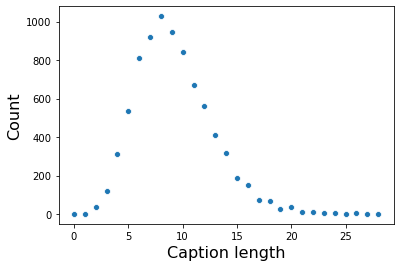

In [111]:
lengths = {k: len(v) for k, v in dataset.caption_lengths.items()}

ax = sns.scatterplot(list(lengths.keys()), list(lengths.values()))
plt.ylabel('Count', fontsize=16)
plt.xlabel('Caption length', fontsize=16)

In [145]:
import torch.utils.data as data

# Randomly sample a caption length, and sample indices with that length.
indices = train_loader.dataset.get_indices()
print('{} sampled indices:'.format(len(indices)))
# Create and assign a batch sampler to retrieve a batch with the sampled indices.
new_sampler = data.sampler.SubsetRandomSampler(indices=indices)
train_loader.batch_sampler.sampler = new_sampler

# Obtain the batch.
for batch in train_loader:
    images, captions = batch[0], batch[1]
    break
    
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)


499 sampled indices:


TypeError: __init__() got an unexpected keyword argument 'batch_size'

In [119]:
# Obtain the batch.
for batch in train_loader:
    images, captions = batch[0], batch[1]
    break
print('images.shape:', images.shape)
print('captions.shape:', captions.shape)

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 12 and 14 in dimension 1 at C:\w\1\s\tmp_conda_3.7_100118\conda\conda-bld\pytorch_1579082551706\work\aten\src\TH/generic/THTensor.cpp:612